Load Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# Add new features for prediction use
# wine_type: red or white
# quality_label: low, medium or high

# Merge two datasets as one

white_wine = pd.read_csv('winequality-white.csv', sep = ';')
red_wine = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [4]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories = ['low', 'medium', 'high'])

In [5]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories = ['low', 'medium', 'high'])

In [6]:
# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [7]:
print(white_wine.shape, red_wine.shape)
print(wines.info())

(4898, 14) (1599, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64

In [8]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 
                    'sulphates', 'alcohol', 'volatile acidity', 
                     'quality']

rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)

pd.concat([rs, ws], 
          axis = 1, 
          keys = ['Red Wine Statistics', 
                  'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [9]:
subset_attributes = ['alcohol', 'volatile acidity',
                     'pH', 'quality']

ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([ls,ms,hs], 
          axis = 1,
          keys = ['Low Quality Wine', 
                  'Medium Quality Wine',
                  'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

In [10]:
##Inferential Statistics

In [11]:
from scipy import stats

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
                      wines[wines['quality_label'] == 'medium']['alcohol'],
                      wines[wines['quality_label'] == 'high']['alcohol'])

print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistics:', F, '\tp-value:', p)

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'],
                      wines[wines['quality_label'] == 'medium']['pH'],
                      wines[wines['quality_label'] == 'high']['pH'])

print('ANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistics:', F, '\tp-value:', p)


F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['volatile acidity'],
                      wines[wines['quality_label'] == 'medium']['volatile acidity'],
                      wines[wines['quality_label'] == 'high']['volatile acidity'])

print('ANOVA test for mean volatile acidity levels across wine samples with different quality ratings')
print('F Statistics:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistics: 673.0745347231032 	p-value: 2.2715337450621843e-266
ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistics: 1.2363860803545201 	p-value: 0.2905002779768688
ANOVA test for mean volatile acidity levels across wine samples with different quality ratings
F Statistics: 250.3391447532201 	p-value: 1.8472285967281885e-105


In [12]:
### Multivariate Analysis

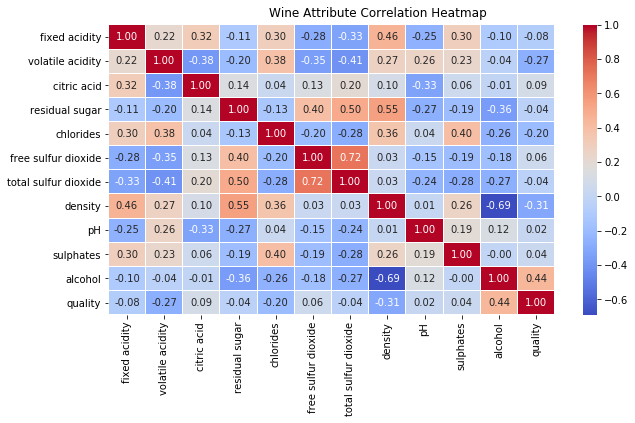

In [13]:
'''
Correlation Map
'''

f, ax = plt.subplots(figsize = (10, 5))
corr = wines.corr()
hm = sns.heatmap(round(corr, 2), 
                 annot = True, 
                 ax = ax, 
                 cmap = "coolwarm", 
                 fmt = '.2f', 
                 linewidths = .05)
f.subplots_adjust(top = 0.93)
t = f.suptitle("Wine Attribute Correlation Heatmap", fontsize = 12)

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


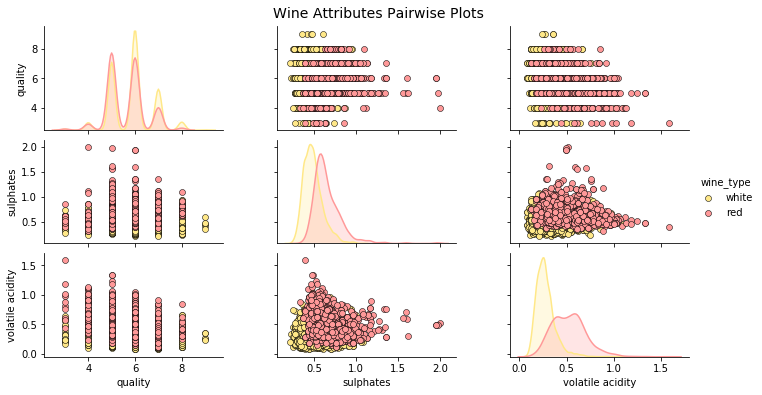

In [14]:
'''
Pairwise plot
'''

cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity']

pp = sns.pairplot(wines[cols], hue = 'wine_type',
                  size = 1.8, aspect = 1.8,
                  palette = {'red': '#FF9999', 'white' : '#FFE888'},
                  plot_kws = dict(edgecolor = 'black', 
                                  linewidth = 0.5))
fig = pp.fig
fig.subplots_adjust(top = 0.93, wspace = 0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize = 14)

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


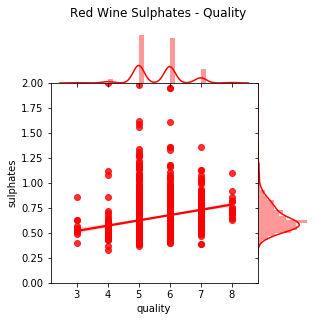

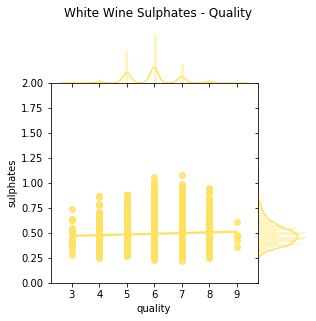

In [15]:
'''
Joint plot of 3 features [type, quality, sulphates]
'''
rj = sns.jointplot(x = 'quality', y = 'sulphates', 
                   data = red_wine, 
                   kind = 'reg',
                   ylim = (0, 2), 
                   color = 'red',
                   space = 0, size = 4.5, ratio = 4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top = 0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize = 12)

wj = sns.jointplot(x = 'quality', y = 'sulphates', 
                   data = white_wine, 
                   kind = 'reg',
                   ylim = (0, 2), 
                   color = '#ffe160',
                   space = 0, size = 4.5, ratio = 4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig
fig.subplots_adjust(top = 0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize = 12)



C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


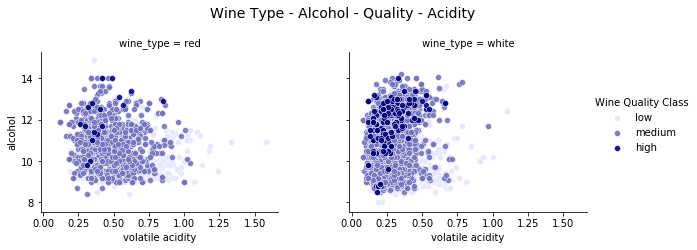

In [16]:
'''
Joint analysis of 2+ variables

[Wine Type, Alcohol, Quality, Acidity']
'''

g = sns.FacetGrid(wines, 
                  col = 'wine_type', 
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('navy', 3))

g.map(plt.scatter, 'volatile acidity', 'alcohol', 
      alpha = 0.9, edgecolor = 'white', linewidth = 0.5)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')

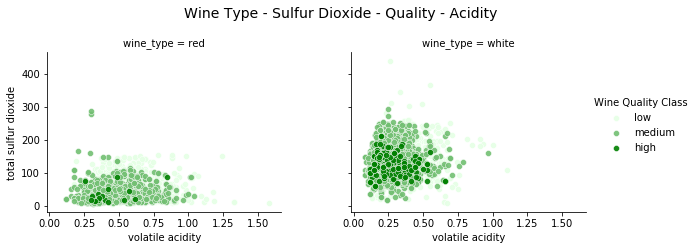

In [17]:
'''
Joint analysis of 2+ variables

[Wine Type, Sulfur Dioxide, Quality, Acidity']
'''

g = sns.FacetGrid(wines, 
                  col = 'wine_type', 
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('green', 3))

g.map(plt.scatter, 'volatile acidity', 'total sulfur dioxide', 
      alpha = 0.9, edgecolor = 'white', linewidth = 0.5)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Quality - Acidity', fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')


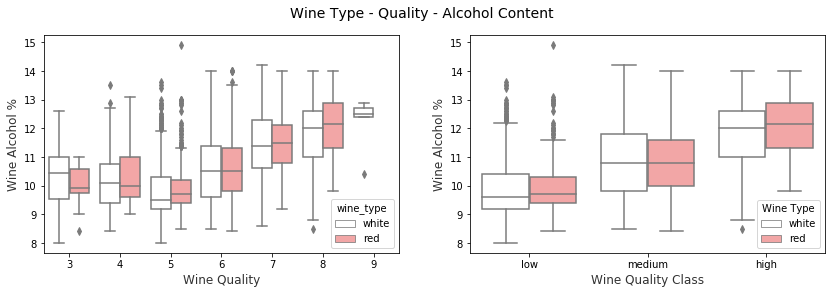

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize = 14)

sns.boxplot(x = 'quality', y = 'alcohol', hue = 'wine_type',
            data = wines, 
            palette = {"red": "#FF9999", 
                       "white": "white"},
            ax = ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)


sns.boxplot(x = 'quality_label', y = 'alcohol', hue = 'wine_type',
            data = wines, 
            palette = {"red": "#FF9999", 
                       "white": "white"},
            ax = ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

l = plt.legend(loc = 'best', title = 'Wine Type')

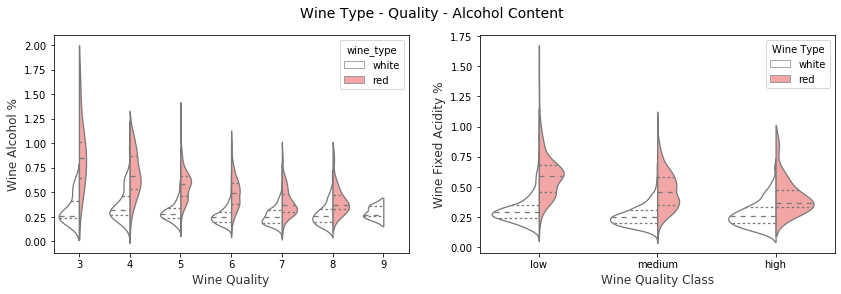

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize = 14)

sns.violinplot(x = 'quality', y = 'volatile acidity', hue = 'wine_type',
               data = wines, 
               split = True,
               inner = 'quart',
               linewidth = 1.3,
               palette = {"red": "#FF9999", 
                          "white": "white"},
               ax = ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)


sns.violinplot(x = 'quality_label', y = 'volatile acidity', hue = 'wine_type',
               data = wines, 
               split = True,
               inner = 'quart',
               linewidth = 1.3,
               palette = {"red": "#FF9999", 
                       "white": "white"},
               ax = ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity %",size = 12,alpha=0.8)

l = plt.legend(loc = 'upper right', title = 'Wine Type')